<a href="https://colab.research.google.com/github/BelenUrdangarin/Data-Science/blob/main/Notebook_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En las clases anteriores, vimos como realizar el analisis exploratorio de los datos, observar el tipo de datos que teniamos, hacernos preguntas y ver algunos patrones. Luego, procesamos y transformamos nuestros datos para luego ajustar modelos de regresión y clasificación.

Llego la hora de utilizar de ver los conceptos de aprendizaje no supervisado para encontrar patrones o grupos de datos.

Utilizaremos nuevamente `scikit-learn` que podes consultar su documentación [aquí](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje No Supervisado 📣 </font>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a trabajar **primero** con el método K-means.

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en scikit-learn. Notemos que estos datos vienen con un label asociado donde nos indica a que cluster pertenecen.

Vamos a trabajar con datos sinteticos para poder focalizarnos en como funciona el algortimo, en lugar de entender las caracteristicas asociadas a los datos. En un proyecto real, deberiamos explorar los datos y realizar el analisis exploratorio y transformacion de variables que ya realizamos.

¿Por qué es importante hacer una exploración de las variables y obtener estadistica descriptiva?

Para poder aplicar K-means, por ejemplo, deben cumplir ciertos requerimientos:
  
K-means asume que:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

In [ ]:
from sklearn.datasets import make_blobs, make_moons

#### Primer Dataset

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)

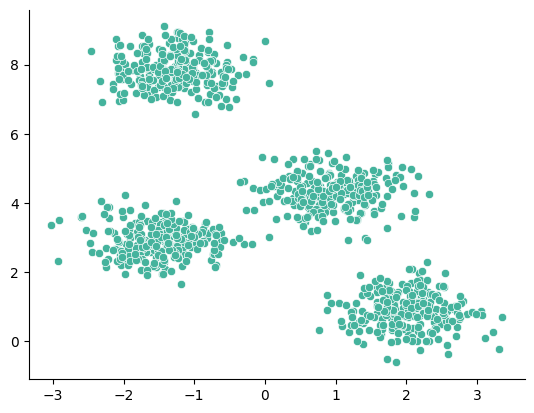

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], color='#45B39D')
sns.despine()
plt.show()

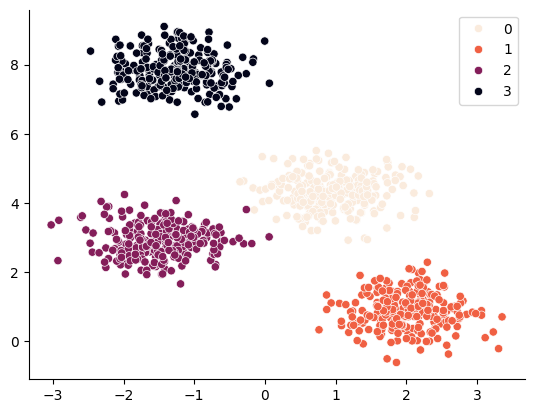

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, palette='rocket_r')
sns.despine()
plt.show()

#### Segundo Dataset

In [ ]:
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)

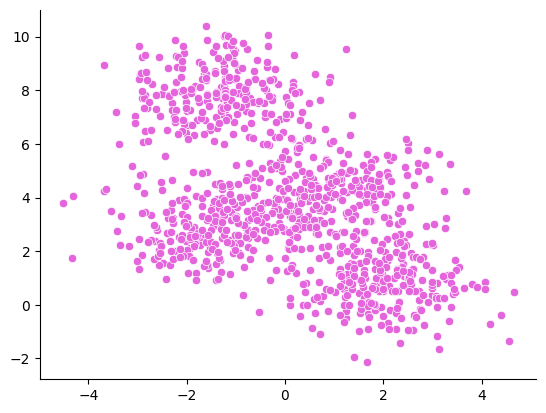

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], color='#E565DD')
sns.despine()
plt.show()

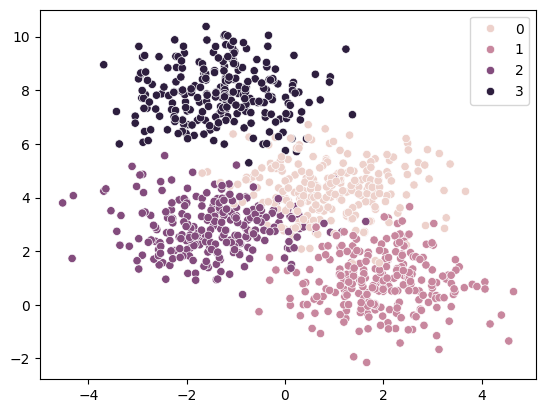

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

#### Tercer Dataset

In [ ]:
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

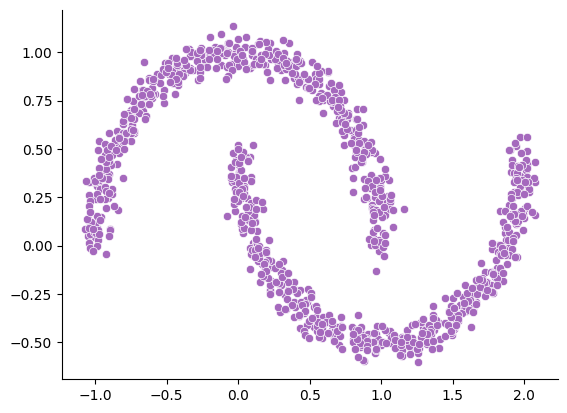

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], color='#A569BD')
sns.despine()
plt.show()

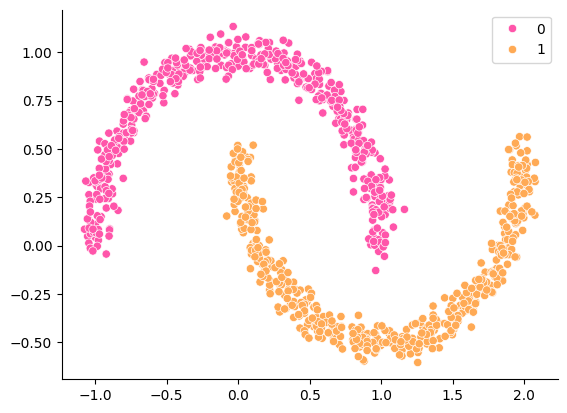

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, palette='spring')
sns.despine()
# Le pasamos el y, eso hace que hay dos colores
# Buscar hue en chap gpt
plt.show()

# K-MEANS

La idea ahora es utilizar el metodo de k-means para poder identificar los clusters sin conocer esta etiqueta.

Como es predecible, scikit-learn tiene una implementación para [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [ ]:
# Importemos la libreria
from sklearn.cluster import KMeans

In [ ]:
# Especificamos el numero adecuado de clusters en cada caso
first_kmeans = KMeans(n_clusters=20, random_state=0)
sec_kmeans = KMeans(n_clusters=4, random_state=0)
thr_kmeans = KMeans(n_clusters=7, random_state=0)

Entrenamos los modelos con los datos sin pasarles las etiquetas.

In [ ]:
# Vamos
first_kmeans.fit(X1);
sec_kmeans.fit(X2)
thr_kmeans.fit(X3);

NameError: name 'first_kmeans' is not defined

Luego de entrenar los modelos, podemos consultar el lugar de los centroides y la cantidad de puntos asignados a cada cluster.

In [ ]:
first_centroids = first_kmeans.cluster_centers_
print(first_centroids)

[[-0.98190571  2.86605841]
 [-0.86410996  8.12204601]
 [ 2.22828786  1.60294014]
 [ 0.64124911  4.94566552]
 [-1.78609312  2.45056964]
 [-1.6323895   7.24531778]
 [ 1.39821235  0.54538122]
 [-2.33042554  3.53138022]
 [ 0.44661103  4.21144144]
 [-1.52521133  3.25774922]
 [ 2.73915578  0.69051607]
 [ 0.90927896  3.59656722]
 [-1.75253786  7.89559907]
 [ 1.57979882  1.28411447]
 [-0.90153616  7.51258985]
 [ 2.10518974  0.92600052]
 [ 1.69259581  4.74697344]
 [ 1.27018718  4.26537551]
 [-1.39868518  8.58561445]
 [ 2.04356521  0.20816485]]


<ipython-input-60-bfd14e6c7fbe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means, palette='vlag')


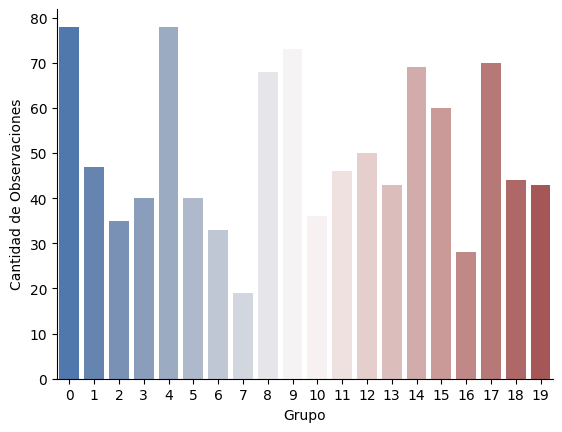

In [ ]:
y_means = first_kmeans.fit_predict(X1)
sns.countplot(x=y_means, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

In [ ]:
second_centroids = sec_kmeans.cluster_centers_
print(second_centroids)

[[-1.50293446  2.87799565]
 [-1.31360134  7.86561393]
 [ 1.99871335  0.79038817]
 [ 0.98587112  4.29528376]]


<ipython-input-62-1a69e135a6f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means, palette='PuBu')


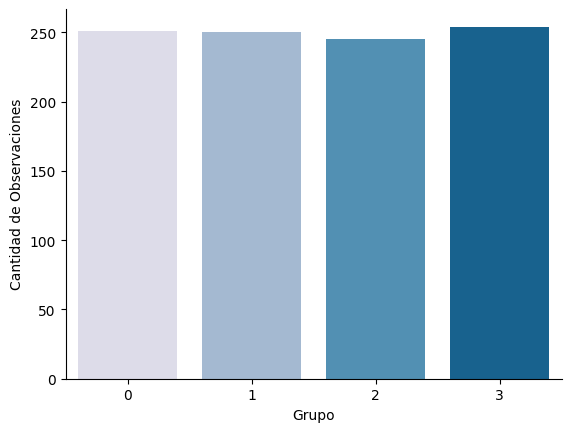

In [ ]:
y_means = sec_kmeans.fit_predict(X2)
sns.countplot(x=y_means, palette='PuBu')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

In [ ]:
third_centroids = thr_kmeans.cluster_centers_
print(third_centroids)

[[0.5006108  0.24937081]]


<ipython-input-68-771153729835>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_means, palette='summer')


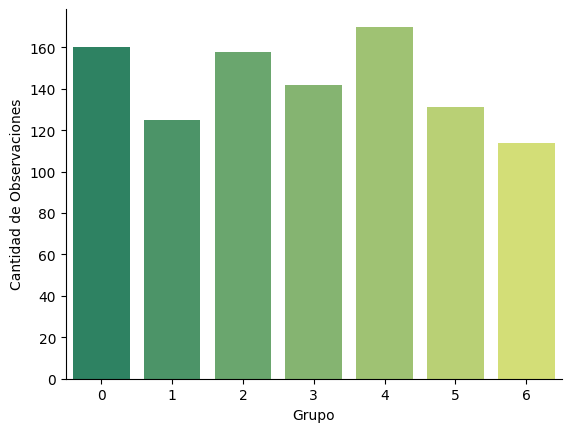

In [ ]:
y_means = thr_kmeans.fit_predict(X3)
sns.countplot(x=y_means, palette='summer')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

También podemos plotear los centros y las etiquetas en un grafico.

In [ ]:
etiquetas_1 = first_kmeans.labels_
etiquetas_2 = sec_kmeans.labels_
etiquetas_3 = thr_kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
# Consultamos las etiquetas using the results from fit_predict
etiquetas_1 = first_kmeans.fit_predict(X1) # Or use the y_means variable if it's still in scope and from the first fit_predict
etiquetas_2 = sec_kmeans.fit_predict(X2)   # Or use the y_means variable
etiquetas_3 = thr_kmeans.fit_predict(X3)   # Or use the y_means variable

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1, palette='Pastel1')
sns.scatterplot(first_centroids[:, 0], first_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

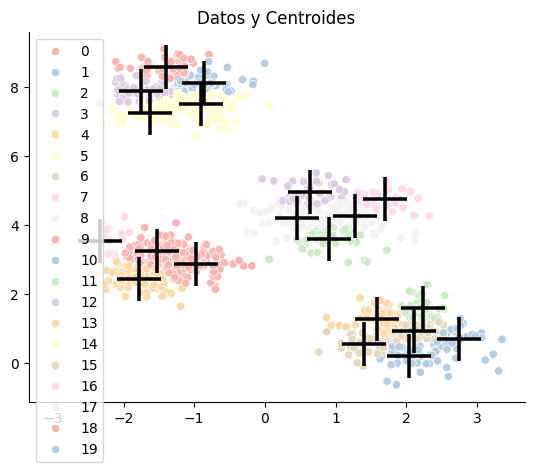

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X1[:, 0], y=X1[:, -1], hue = etiquetas_1, palette='Pastel1')
sns.scatterplot(x=first_centroids[:, 0], y=first_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2, palette='Wistia')
sns.scatterplot(second_centroids[:, 0], second_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

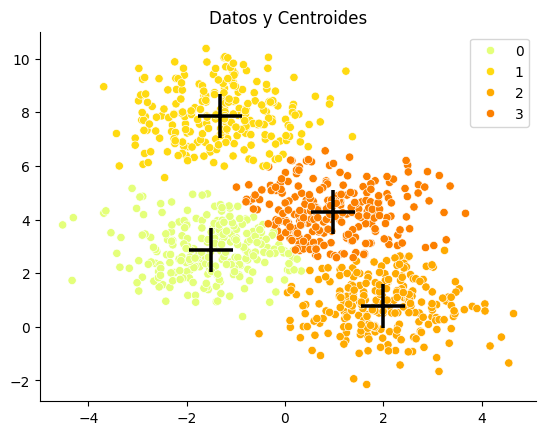

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X2[:, 0], y=X2[:, -1], hue = etiquetas_2, palette='Wistia')
sns.scatterplot(x=second_centroids[:, 0], y=second_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3, palette='Set2')
sns.scatterplot(third_centroids[:, 0], third_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

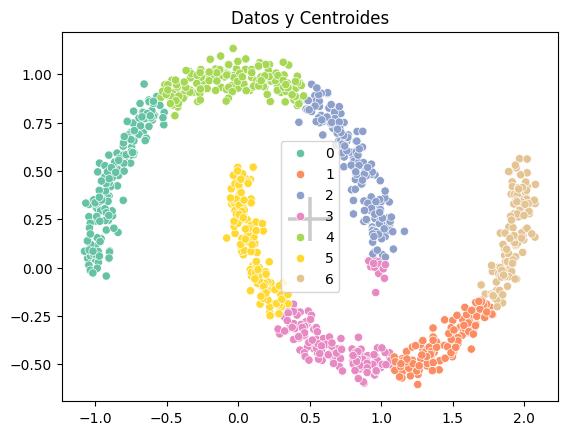

In [ ]:
# Graficando los datos y centroides en 2D
sns.scatterplot(x=X3[:, 0], y=X3[:, -1], hue = etiquetas_3, palette='Set2')
sns.scatterplot(x=third_centroids[:, 0], y=third_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
plt.show()

# DBSCAN

Ya vimos que Kmeans no tiene un buen desempeño cuando los cluesters no tienen forma de esfera. Veamos ahora como se comporta metodo de DBSCAN para poder identificar los clusters.

Scikit-learn tiene una implementación para [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).


Inicializemos ahora tres modelos, uno para cada dataset y ajustemoslos.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.20, min_samples=2)
dbscan_2 = DBSCAN(eps=0.4, min_samples=12)
dbscan_3 = DBSCAN(eps=0.7, min_samples=100)

In [ ]:
dbscan_1.fit(X1)
dbscan_2.fit(X2)
dbscan_3.fit(X3)

DBSCAN(eps=0.7, min_samples=100)

Definamos ahora una función para graficar el resultado de los modelos.

In [ ]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Numero estimado de clusters: %d' % n_clusters_1)
    plt.show()

Veamos como le fue a DBSCAN con el primer dataset:

In [ ]:
# Consultamos las etiquetas
labels_1 = dbscan_1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [ ]:
print('Numero estimado de clusters: %d' % n_clusters_1)
print('Numero estimado de puntos outliers: %d' % n_noise_1)

Numero estimado de clusters: 22
Numero estimado de puntos outliers: 40


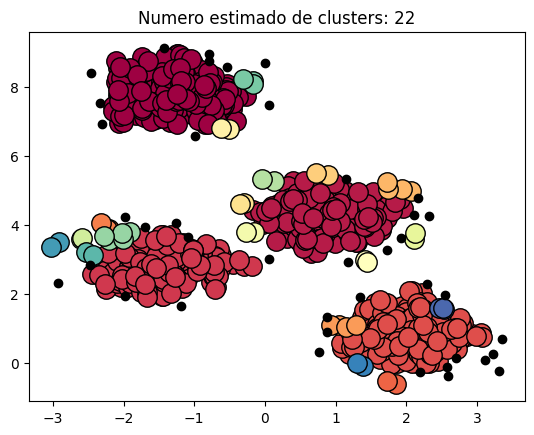

In [ ]:
plot_DBSCAN(X1, labels_1, dbscan_1, n_clusters_1)

Veamos ahora el segundo caso:

Numero estimado de clusters: 4
Numero estimado de puntos outliers: 300


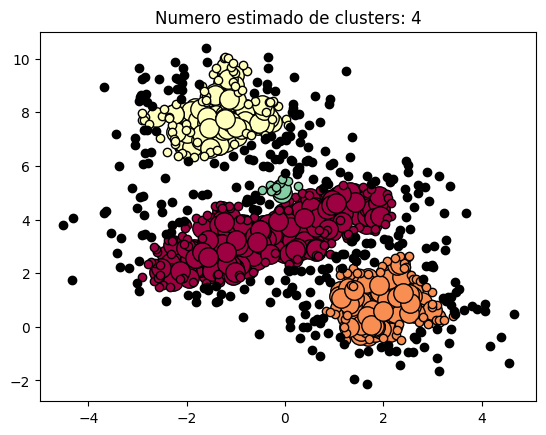

In [ ]:
labels_2 = dbscan_2.labels_
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

print('Numero estimado de clusters: %d' % n_clusters_2)
print('Numero estimado de puntos outliers: %d' % n_noise_2)

core_samples_mask_2 = np.zeros_like(dbscan_2.labels_, dtype=bool)
core_samples_mask_2[dbscan_2.core_sample_indices_] = True

plot_DBSCAN(X2, labels_2, dbscan_2, n_clusters_2)

En este caso, si comparamos con el resultado de Kmeans, vemos que no le fue tan bien a DBSCAN. Pero que pasara en el tercer caso?

Numero estimado de clusters: 1
Numero estimado de puntos outliers: 0


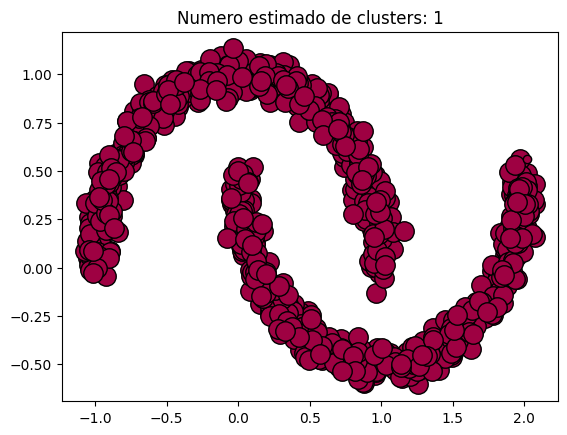

In [ ]:
labels_3 = dbscan_3.labels_
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print('Numero estimado de clusters: %d' % n_clusters_3)
print('Numero estimado de puntos outliers: %d' % n_noise_3)

core_samples_mask_3 = np.zeros_like(dbscan_3.labels_, dtype=bool)
core_samples_mask_3[dbscan_3.core_sample_indices_] = True

plot_DBSCAN(X3, labels_3, dbscan_3, n_clusters_3)

Como dijimos en la parte teorica, DBSCAN es muy efectivo cuando los clusters no tienen forma de esfera. Es el caso del dataset 3, Kmeans tenia una performance muy baja, sin embargo DBSCAN puede hacer clusters que tienen mas sentido.

# Evaluación de los Clusters

Uno de los pasos para realizar el clustering es determinar cuál es el número optimo de clusters. Vimos dos métodos para realizar esto. Vamos a analizarlos.

- **Metodo Elbow**: within-cluster variation vs. K

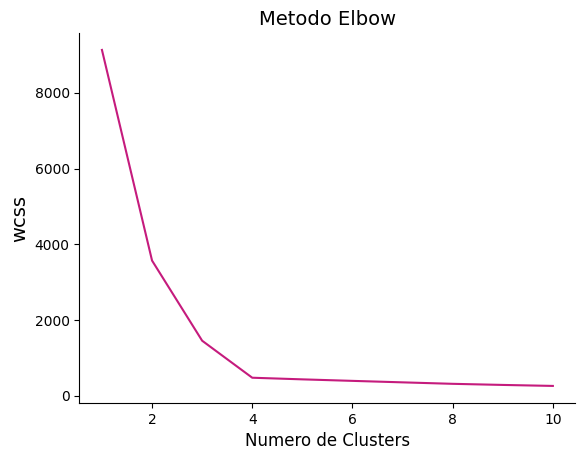

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X1)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

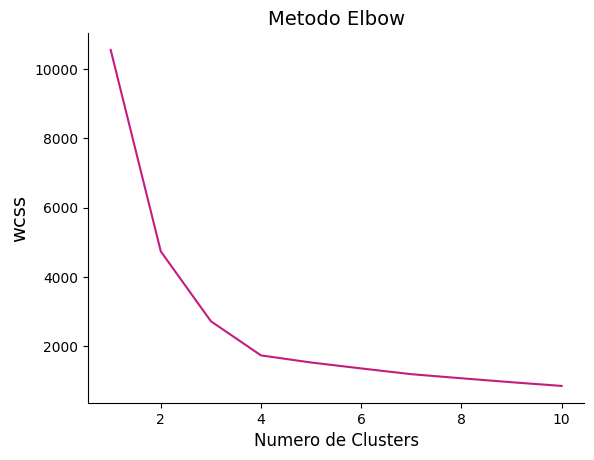

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X2)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

- **Método Silhouette**: Distancia a puntos del mismo cluster vs. puntos de distinto cluster

### K-Means

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X1)
    labels = kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric='euclidean'))

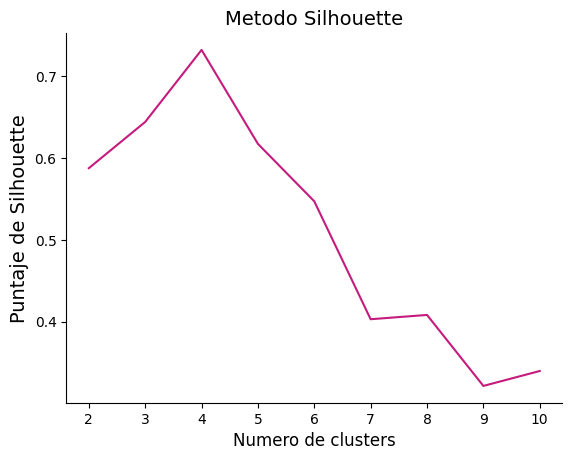

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X2)
    labels = kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric='euclidean'))

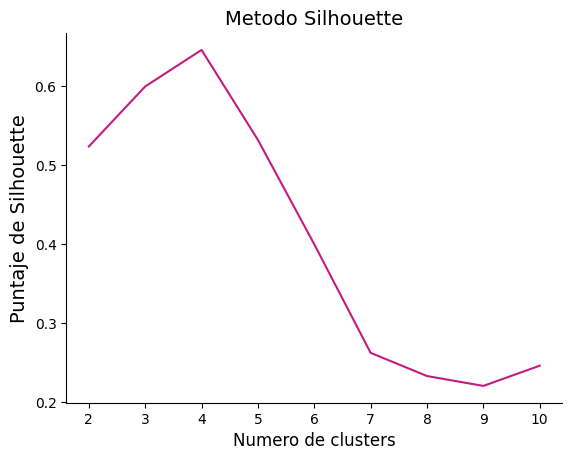

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


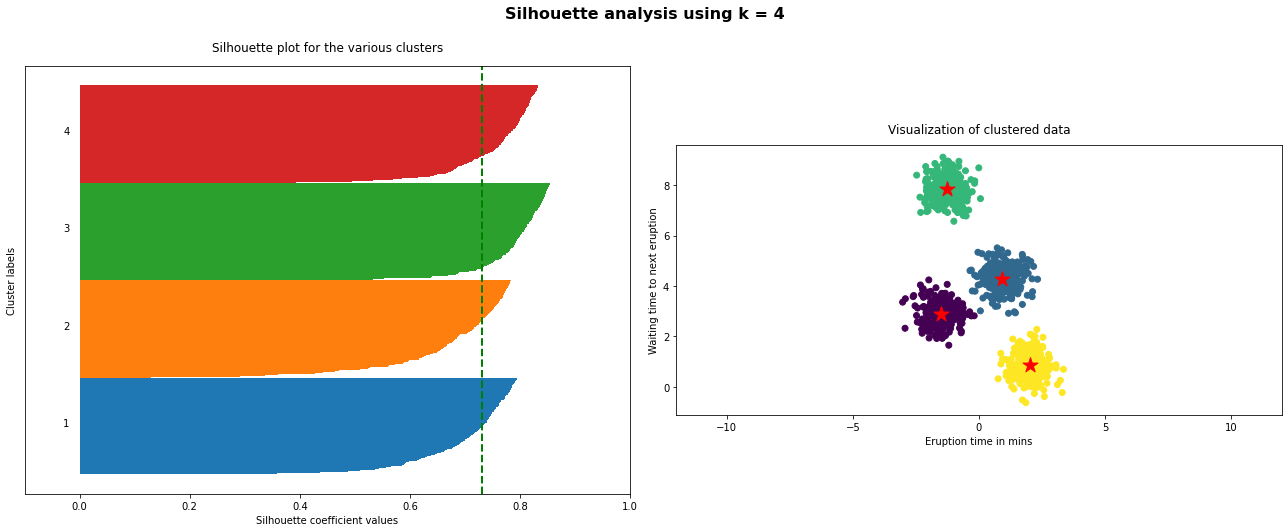

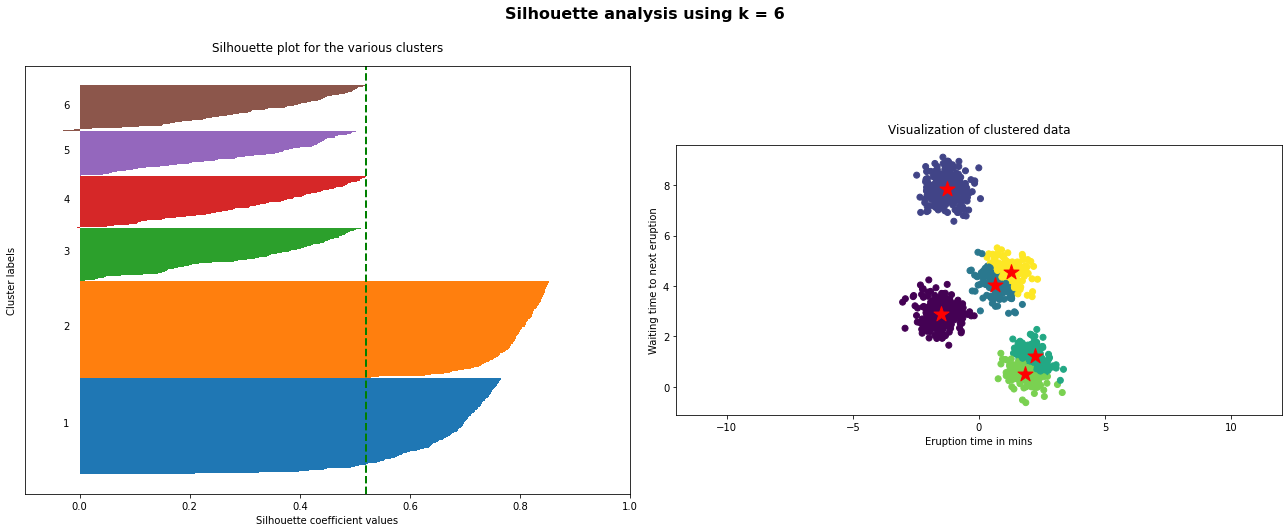

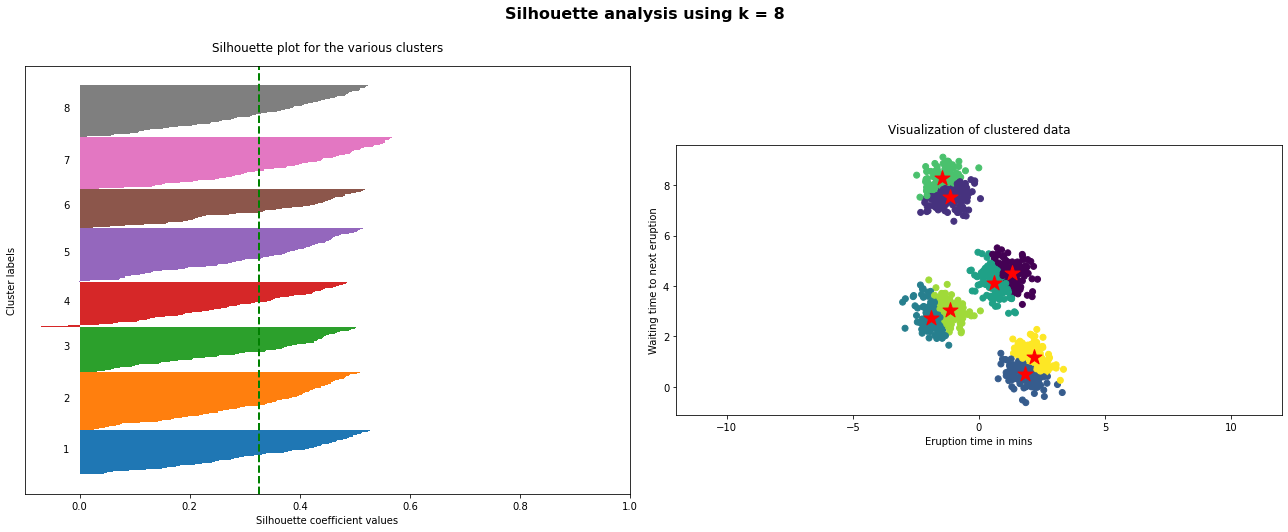

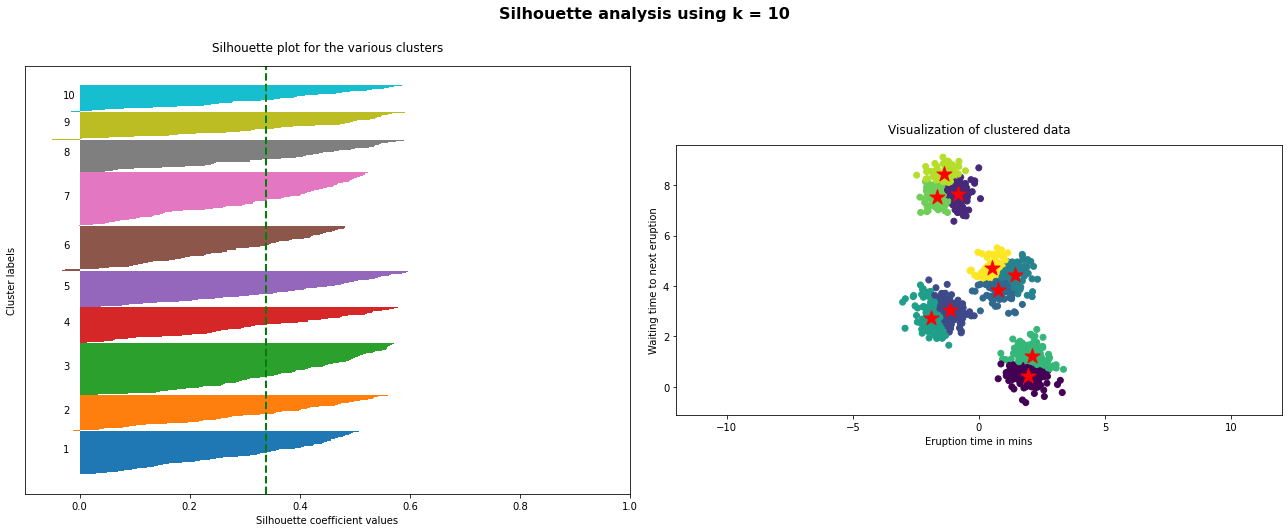

In [ ]:
from sklearn.metrics import silhouette_samples

X_std = X1
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);